<a href="https://colab.research.google.com/github/DevTedd/Regression-Analysis-Moringa-Core-W6/blob/main/Independent_Project_Regression_Basic_Moringa_Ted_Mwangi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

# Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type


**Model 1**: Predict how many goals the home team scores.

**Model 2**: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

# Dataset Columns



* Rank
* Country Abbreviation
* Total Points
* Previous Points
* Rank Change
* Average Previous Years Points
* Average Previous Years Points Weighted (50%)
* Average 2 Years Ago Points
* Average 2 Years Ago Points Weighted (30%)
* Average 3 Years Ago Points
* Average 3 Years Ago Points Weighted (20%)
* Confederation
* Date - date of the match
* Home_team - the name of the home team
* Away_team - the name of the away team
* Home_score - full-time home team score including extra time, not including penalty-shootouts
* Away_score - full-time away team score including extra time, not including penalty-shootouts
* Tournament - the name of the tournament
* City - the name of the city/town/administrative unit where the match was played
* Country - the name of the country where the match was played
* Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue




# 1. Defining the question






# A) Specifying the questions 




*   Predict how many goals the home team scores.

*   Predict how many goals the away team scores.

*   Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)


# B) Defining the metric for Success


*  Model 1: Predict how many goals the home team scores.
*  Model 2: Predict how many goals the away team scores.
*   Model 3 : Being able to tell how the home team perfromed 



# C) Understanding the context

The datasets are derived from the Fifa World Rankings database for football games payed by men split into country teams. Its from 1993 to 2018 and can be confirmed by checking the results from the databse to those that are hosted online 

# 2) Reading in the data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb


In [3]:
#Importing the dataset
fifa = pd.read_csv('/content/drive/MyDrive/Week 6 IP/Week 6 IP Datasets/fifa_ranking.csv')
results = pd.read_csv('/content/drive/MyDrive/Week 6 IP/Week 6 IP Datasets/results.csv')

In [4]:
#Seeing what is in the fifa set details
fifa.shape

(57793, 16)

In [5]:
#seeing the head of the fifa set
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
#seeing the tail
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [7]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [8]:
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [9]:
#Seeing the results dataframe
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [10]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [11]:
results.shape

(40839, 9)

In [12]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [13]:
results.describe()
#On average we can see the home team scores more goal than the away team, this is also backed up by the maximum values where the home score is 10 goal larger, but the dispersion in most of the games is similar 

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


Now that the dataset has been loaded we will move onto the EDA. 


In [14]:
results.info()
#There is no missing data in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


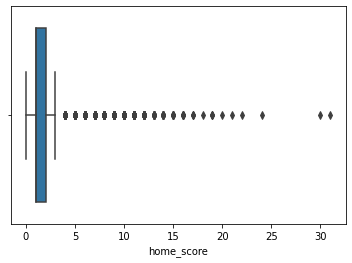

In [15]:
#Checking for outliers
results.describe()
sb.boxplot(x = results['home_score'])

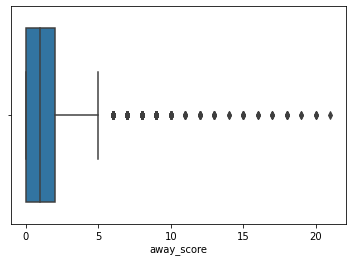

In [16]:
sb.boxplot(x = results['away_score'])
#Majority of goals scored per game is ussualy less than 3 which is true with some games being exceptions with more
#I wont remove these as they do occur and training a model to ignore them isnt suitable 

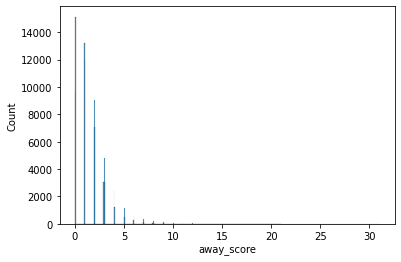

In [17]:
#The second step is to perfom some univariate analysis 
sb.histplot(x=results['away_score'])
sb.histplot(x=results['home_score'])

In [18]:
#Time to do encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [19]:
results['tournamentEnco'] = label.fit_transform(results['tournament'])
results['home_teamEnco'] = label.fit_transform(results['home_team'])
results['away_teamEnco'] = label.fit_transform(results['away_team'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,tournamentEnco,home_teamEnco,away_teamEnco
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,54,238,85
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,54,85,233
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,54,238,85
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,54,85,233
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,54,238,85


In [20]:
results['tournament'].unique()
#the different types of tournaments are quite large

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [21]:
cors = results.corr()
cors
#The values are not ver related

,home_score,away_score,neutral,tournamentEnco,home_teamEnco,away_teamEnco
home_score,1.000000,-0.133412,-0.031660,0.003414,0.005179,-0.014927
away_score,-0.133412,1.000000,0.084335,0.029274,-0.019501,0.024628
neutral,-0.031660,0.084335,1.000000,-0.109582,-0.079991,0.102481
tournamentEnco,0.003414,0.029274,-0.109582,1.000000,-0.013873,-0.011635
home_teamEnco,0.005179,-0.019501,-0.079991,-0.013873,1.000000,-0.008210
away_teamEnco,-0.014927,0.024628,0.102481,-0.011635,-0.008210,1.000000


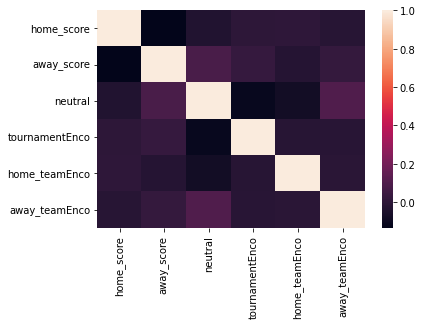

In [22]:
sb.heatmap(results.corr())

In [23]:
#I will now drop the neutral collumn and see if that affects the correleation, its a boolean but it somehow showed up in the correlation table
updated = results.drop(['neutral'], axis = 1)
cors = updated.corr()
cors

,home_score,away_score,tournamentEnco,home_teamEnco,away_teamEnco
home_score,1.000000,-0.133412,0.003414,0.005179,-0.014927
away_score,-0.133412,1.000000,0.029274,-0.019501,0.024628
tournamentEnco,0.003414,0.029274,1.000000,-0.013873,-0.011635
home_teamEnco,0.005179,-0.019501,-0.013873,1.000000,-0.008210
away_teamEnco,-0.014927,0.024628,-0.011635,-0.008210,1.000000


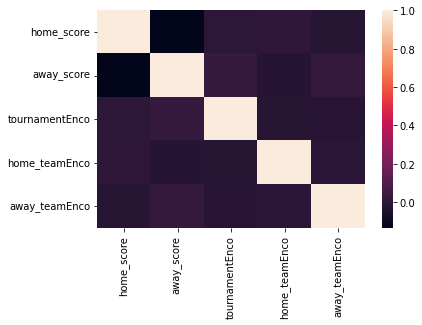

In [24]:
sb.heatmap(cors)
#still very negligable values for the correlations

In [25]:
pd.DataFrame(np.linalg.inv(cors.values), index = cors.index, columns=cors.columns)
#None of the values are dependent on each other, we can move on to modeling

,home_score,away_score,tournamentEnco,home_teamEnco,away_teamEnco
home_score,1.018322,0.135731,-0.007349,-0.002632,0.011751
away_score,0.135731,1.019932,-0.030334,0.018575,-0.023293
tournamentEnco,-0.007349,-0.030334,1.001244,0.013439,0.012397
home_teamEnco,-0.002632,0.018575,0.013439,1.000627,0.007875
away_teamEnco,0.011751,-0.023293,0.012397,0.007875,1.000958


In [26]:
updated.info()
#Slicing the df in order to get the team details and score alone
score_teams = updated.drop(['date','home_team','away_team','tournament','city','country',], axis =1)
score_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            40839 non-null  object
 1   home_team       40839 non-null  object
 2   away_team       40839 non-null  object
 3   home_score      40839 non-null  int64 
 4   away_score      40839 non-null  int64 
 5   tournament      40839 non-null  object
 6   city            40839 non-null  object
 7   country         40839 non-null  object
 8   tournamentEnco  40839 non-null  int64 
 9   home_teamEnco   40839 non-null  int64 
 10  away_teamEnco   40839 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   home_score      40839 non-null  int64
 1   away_score      40839 non-n

In [27]:
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [28]:
#I need to create a team rank based on the fifa dataframe,ill create a ranking coulmun in results
rank = fifa[['rank','country_full']]
rank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          57793 non-null  int64 
 1   country_full  57793 non-null  object
dtypes: int64(1), object(1)
memory usage: 903.1+ KB


In [29]:
#performing an inner left join using country_full and country column labels
combined = pd.merge(rank,results, left_on='country_full', right_on='country')

In [30]:
combined.head()
#now to only select the columns we require 

,rank,country_full,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,tournamentEnco,home_teamEnco,away_teamEnco
0,1,Germany,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,54,104,257
1,1,Germany,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False,54,104,27
2,1,Germany,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False,54,104,183
3,1,Germany,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False,54,104,257
4,1,Germany,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,Germany,False,54,104,18


In [31]:
combined = combined.drop(['country_full','date','city','country','neutral'], axis = 1)


In [32]:
#Preparing the dataset
cors = combined.corr()
pd.DataFrame(np.linalg.inv(cors.values), index = cors.index, columns=cors.columns)
#all values are close to one

,rank,home_score,away_score,tournamentEnco,home_teamEnco,away_teamEnco
rank,1.031873,0.079536,-0.086791,0.120775,-0.023341,-0.044125
home_score,0.079536,1.023686,0.125885,0.007094,0.001241,0.011452
away_score,-0.086791,0.125885,1.025947,-0.033294,0.022117,-0.015565
tournamentEnco,0.120775,0.007094,-0.033294,1.016499,0.032311,0.019605
home_teamEnco,-0.023341,0.001241,0.022117,0.032311,1.002228,0.008050
away_teamEnco,-0.044125,0.011452,-0.015565,0.019605,0.008050,1.003186


# Modeling Section


In [33]:
#Preparing the model libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [34]:
combined.head(2)

,rank,home_team,away_team,home_score,away_score,tournament,tournamentEnco,home_teamEnco,away_teamEnco
0,1,Germany,Switzerland,1,0,Friendly,54,104,257
1,1,Germany,Belgium,0,3,Friendly,54,104,27


**First model predicting home team scores**

In [35]:
#The first step is to split the data with the number of goals being the Y variable
X = combined.drop(['home_team','away_team','away_score','tournament','away_teamEnco','home_score'],axis = 1)
y = combined['home_score']

In [36]:
#The first step is to split the data with the number of goals being the Y variable
X = combined.drop(['home_team',	'away_team','home_score','tournament'],axis = 1)
y = combined['home_score']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#Splitting the data into train and test

In [38]:
X

,rank,away_score,tournamentEnco,home_teamEnco,away_teamEnco
0,1,0,54,104,257
1,1,3,54,104,27
2,1,2,54,104,183
3,1,2,54,104,257
4,1,2,54,104,18
...,...,...,...,...,...
10246505,195,2,97,106,190
10246506,195,1,97,106,154
10246507,195,6,97,106,13
10246508,195,1,96,106,215


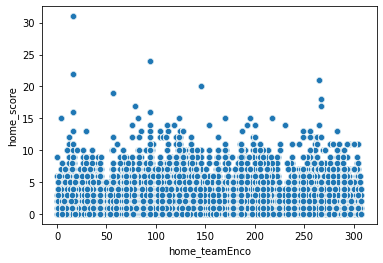

In [39]:
sb.scatterplot(x=X['home_teamEnco'],y = y,data=combined)
#No obvious correlation betwen the home team and the number of goals scored

In [40]:
#Fitting Polynomial regression for home scores
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
#Attempting visualization
plt.scatter(X['home_teamEnco'], y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home Score Prediction (Polynomial Regression)')
plt.xlabel('Team Number')
plt.ylabel('Score')
plt.show()
#Does not run

In [42]:
#Predicting the home score using the team number
#pol_reg.predict(poly_reg.fit_transform([[6]]))
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))
poly_arr_pred

array([2.18128119, 1.84660584, 1.93454492, ..., 0.40755798, 1.73984524,
       1.71339622])

In [46]:
#admit_pred = pol_reg.predict(X)
residuals = np.subtract(poly_arr_pred,y)

In [47]:
#Finding the average residual from the models prediction
residuals.mean()

5.312889373361356e-15

In [50]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(poly_arr_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(poly_arr_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value )

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


**Next Step is predicitng the away team score**



Will be very similar to the previous one

In [51]:
#The first step is to split the data with the number of goals being the Y variable
X = combined.drop(['rank','home_team','away_team','away_score','tournament','home_teamEnco','tournamentEnco','home_score'],axis = 1)
y = combined['away_score']


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
#Splitting the data into train and test

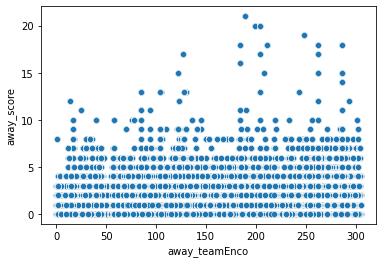

In [53]:
sb.scatterplot(x=X['away_teamEnco'],y = y,data=combined)
#No obvious correlation betwen the  team and the number of goals scored

In [54]:
#Fitting Polynomial regression for away scores
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [55]:
#Predicting the away score using the team number
pol_reg.predict(poly_reg.fit_transform([[54]]))

array([1.1494623])

# Next is the Logistic Model


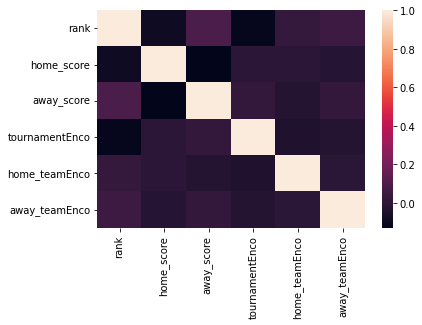

In [56]:
sb.heatmap(combined.corr())

In [57]:
#We will use the dataframe from before(Combined) and create a new colum based on the status of the team
game_conditions = [
                   (combined['home_score'] > combined['away_score']),
                   (combined['home_score'] == combined['away_score']),
                   (combined['home_score'] < combined['away_score'])
]

value = ['Win','Draw','Loss']

combined['Status'] = np.select(game_conditions, value)

In [58]:
combined.head()

,rank,home_team,away_team,home_score,away_score,tournament,tournamentEnco,home_teamEnco,away_teamEnco,Status
0,1,Germany,Switzerland,1,0,Friendly,54,104,257,Win
1,1,Germany,Belgium,0,3,Friendly,54,104,27,Loss
2,1,Germany,Netherlands,1,2,Friendly,54,104,183,Loss
3,1,Germany,Switzerland,6,2,Friendly,54,104,257,Win
4,1,Germany,Austria,1,2,Friendly,54,104,18,Loss


In [59]:
#Next step is to categorise the status coulumn in preparation of training the model
combined['StatusNum'] = label.fit_transform(combined['Status'])
combined.head()

,rank,home_team,away_team,home_score,away_score,tournament,tournamentEnco,home_teamEnco,away_teamEnco,Status,StatusNum
0,1,Germany,Switzerland,1,0,Friendly,54,104,257,Win,2
1,1,Germany,Belgium,0,3,Friendly,54,104,27,Loss,1
2,1,Germany,Netherlands,1,2,Friendly,54,104,183,Loss,1
3,1,Germany,Switzerland,6,2,Friendly,54,104,257,Win,2
4,1,Germany,Austria,1,2,Friendly,54,104,18,Loss,1


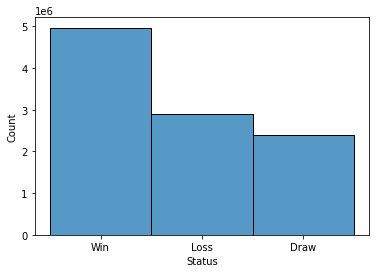

In [60]:
sb.histplot(combined['Status'])
#Wins are the most common, followd by loses by the home team and lastly draws

In [61]:
combined.head(3)

,rank,home_team,away_team,home_score,away_score,tournament,tournamentEnco,home_teamEnco,away_teamEnco,Status,StatusNum
0,1,Germany,Switzerland,1,0,Friendly,54,104,257,Win,2
1,1,Germany,Belgium,0,3,Friendly,54,104,27,Loss,1
2,1,Germany,Netherlands,1,2,Friendly,54,104,183,Loss,1


In [62]:
#Splitting the dataset to predict the status of the home team
X = combined.drop(['home_team','away_team','tournament','Status','StatusNum'], axis=1)
y = combined['StatusNum']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=265)

In [ ]:
#Fitting the model
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression()
logR.fit(X_train,y_train)

In [ ]:
#Making predictions
y_preds = logR.predict(X_test)

In [ ]:
# Evaluating the model

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_preds)
confusion_matrix

The model has 100% accuracy, normally this is a issue of over-fitting but im taking this as a sign that the data sets X variables were enough to accurately predcit when which team would win 